# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [10]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


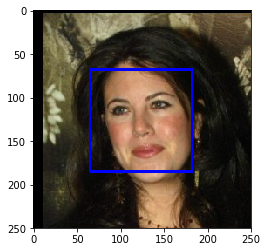

In [11]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[11])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [12]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ <br>
`human_files`: 99% <br>
`dog_files`: 11%

In [13]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# test the accuracy among human faces
human_face_count = 0.

for human_img in tqdm(human_files_short):
    human_face_count += face_detector(human_img)

human_accuracy = human_face_count / len(human_files_short)
print('What percentage of the first 100 images in "human_files" have a detected human face?\n' + 
      'That is: {:.1f} percent.'.format(human_accuracy*100))

# test the accuracy among dog images
human_face_count = 0.

for dog_img in tqdm(dog_files_short):
    human_face_count += face_detector(dog_img)
    
dog_accuracy = human_face_count / len(dog_files_short)
print('What percentage of the first 100 images in "dog_files" have a detected human face?\n' + 
      'That is: {:.1f} percent.'.format(dog_accuracy*100))

  1%|          | 1/100 [00:00<00:15,  6.57it/s]

What percentage of the first 100 images in "human_files" have a detected human face?
That is: 99.0 percent.


100%|██████████| 100/100 [00:31<00:00,  3.51it/s]

What percentage of the first 100 images in "dog_files" have a detected human face?
That is: 11.0 percent.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [15]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [16]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Load the image
    img = Image.open(img_path)
    
    # Transform and Normalize the input image
    size = 224
    img_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    # transform the input image
    img = img_transform(img)
    # convert data tensor to cuda
    if use_cuda:
        img = img.cuda()
    # insert a new axis to match the dimension (batch, C, H, W)
    img = img.unsqueeze(0)
    
    # Sets the module in evaluation mode to turn off Dropout
    VGG16.eval()
    # make prediction with VGG16
    output = VGG16(img)    # return a tensor of shape (batch=1, #classes)
    # return the index with the highest value
    prediction = output.data.argmax(dim=1)
    
    return prediction.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [17]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    result = index in range(151, 269)
    
    return result # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ <br>
`human_files_short`: 0% <br>
`dog_files_short`: 98% <br>

In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# test accuracy on human images
dog_count = 0.
for human_img in tqdm(human_files_short):
    dog_count += dog_detector(human_img)

human_accuracy = dog_count / len(human_files_short)
print('What percentage of the images in "human_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(human_accuracy*100))

# test accuracy on dog images
dog_count = 0.
for dog_img in tqdm(dog_files_short):
    dog_count += dog_detector(dog_img)

dog_accuracy = dog_count / len(dog_files_short)
print('What percentage of the images in "dog_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(dog_accuracy*100))

  3%|▎         | 3/100 [00:00<00:03, 27.44it/s]

What percentage of the images in "human_files_short" have a detected dog?
That is: 0.0 percent.


100%|██████████| 100/100 [00:04<00:00, 23.10it/s]

What percentage of the images in "dog_files_short" have a detected dog?
That is: 98.0 percent.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [19]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

### Obtain pre-trained model ResNet50

In the next following cells I will use pretrained ResNet50 model to detect dog in images.

In [20]:
# loading Resnet50 model
resnet = models.resnet50(pretrained=True)

if use_cuda:
    resnet = resnet.cuda()

In [21]:
def resnet_predict(img_path):
    '''
    Receives an image path and then returns the index of the prediction
    '''
    # load image from path
    img = Image.open(img_path)
    
    # perform transformation for image
    img_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    
    img = img_transform(img)
    
    # convert data tensor to cuda
    if use_cuda:
        img = img.cuda()
    
    # insert a new axis to match the dimension (1, C, H, W)
    img = img.unsqueeze(0)
    
    # Sets the module in evaluation mode to turn off Dropout
    resnet.eval()
    
    # make prediction
    output = resnet(img)    # returns a tensor of shape (1, 1000: #classes)
    
    # return the index with the highest probability
    prediction = output.data.argmax(dim=1)
    
    return prediction.item()

In [22]:
def resnet_dog_detector(img_path):
    '''
    Receives an image path and then returns True/False whether the predicted index in range 151-269, inclusive
    '''
    index = resnet_predict(img_path)
    result = index in range(151, 269)
    
    return result # true/false

__Answer:__ <br>
`human_files_short`: 0% <br>
`dog_files_short`: 95% <br>


In [23]:
# test accuracy on human images
dog_count = 0.
for human_img in tqdm(human_files_short):
    dog_count += resnet_dog_detector(human_img)

human_accuracy = dog_count / len(human_files_short)
print('What percentage of the images in "human_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(human_accuracy*100))

# test accuracy on dog images
dog_count = 0.
for dog_img in tqdm(dog_files_short):
    dog_count += resnet_dog_detector(dog_img)

dog_accuracy = dog_count / len(dog_files_short)
print('What percentage of the images in "dog_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(dog_accuracy*100))

  5%|▌         | 5/100 [00:00<00:02, 42.47it/s]

What percentage of the images in "human_files_short" have a detected dog?
That is: 0.0 percent.


100%|██████████| 100/100 [00:03<00:00, 31.19it/s]

What percentage of the images in "dog_files_short" have a detected dog?
That is: 95.0 percent.


### Obtain pre-trained model Inception_v3

In the next following cells I will use pretrained Inception_v3 model to detect dog in images.

In [24]:
# loading Inception_V3 model
inceptionv3 = models.inception_v3(pretrained=True)

if use_cuda:
    inceptionv3 = inceptionv3.cuda()

In [25]:
def inceptionv3_predict(img_path):
    '''
    Receives an image path and then returns the index of the prediction
    '''
    # load image from path
    img = Image.open(img_path)
    
    # perform transformation for image
    img_transform = transforms.Compose([
        transforms.Resize(329),
        transforms.CenterCrop(299),    # the input size for Inception must be at least 229
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    
    img = img_transform(img)
    
    # convert data tensor to cuda
    if use_cuda:
        img = img.cuda()
    
    # insert a new axis to match the dimension (1, C, H, W)
    img = img.unsqueeze(0)
    
    # Sets the module in evaluation mode to turn off BatchNorm since we only have 1 input image
    inceptionv3.eval()
    
    # make prediction
    output = inceptionv3(img)    # returns a tensor of shape (1, 1000: #classes)
    
    # return the index with the highest probability
    prediction = output.data.argmax(dim=1)
    
    return prediction.item()

In [26]:
def inception_dog_detector(img_path):
    '''
    Receives an image path and then returns True/False whether the predicted index in range 151-269, inclusive
    '''
    index = inceptionv3_predict(img_path)
    result = index in range(151, 269)
    
    return result # true/false

__Answer:__ <br>
`human_files_short`: 1% <br>
`dog_files_short`: 99% <br>


In [27]:
# test accuracy on human images
dog_count = 0.
for human_img in tqdm(human_files_short):
    dog_count += inception_dog_detector(human_img)

human_accuracy = dog_count / len(human_files_short)
print('What percentage of the images in "human_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(human_accuracy*100))

# test accuracy on dog images
dog_count = 0.
for dog_img in tqdm(dog_files_short):
    dog_count += inception_dog_detector(dog_img)

dog_accuracy = dog_count / len(dog_files_short)
print('What percentage of the images in "dog_files_short" have a detected dog?')
print('That is: {:.1f} percent.'.format(dog_accuracy*100))

  3%|▎         | 3/100 [00:00<00:03, 27.81it/s]

What percentage of the images in "human_files_short" have a detected dog?
That is: 1.0 percent.


100%|██████████| 100/100 [00:04<00:00, 22.07it/s]

What percentage of the images in "dog_files_short" have a detected dog?
That is: 99.0 percent.


## Conclusion:
** Based on the results from 3 models above, the VGG16 and ResNet50 have the same results that they don't find any dog in sample 100 human face images, while the Inception_v3 detect 1 image. However, the Inception_v3 model outperforms the other 2 in detecting dog in ```dog_files_short``` with 99 out of 100 images, while ResNet50 has the lowest results (95 out of 100) and VGG16 can detect 98 out of 100.**

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imbalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [28]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define train, valid and test data directories
dog_dir = './dogImages/'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')

# load and transform data
size_crop = 227    # AlexNet input

# perform data transform WITH DATA AUGMENTATION for training data
train_data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(size_crop),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])
# perform data transform for valid/test data (NO DATA AUGMENTATION)
# we only resize, crop and normalize the valid/test dataset
valid_test_data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(size_crop),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)

# print out some data stats
print('Total num of breeds: ', len(train_data.classes))
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

# create data loaders 
batch_size = 32
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers,
                                          shuffle=True)

# store all 3 above loaders into a dictionary
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Total num of breeds:  133
Num training images:  6680
Num validation images:  835
Num test images:  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: <br>
**- How does your code resize the images (by cropping, stretching, etc)? <br> **
- The images are resized to size 256, then are cropped with our desired size 227.

** - What size did you pick for the input tensor, and why? **
- I choose the input tensor of size 227x227 since my model architecture is based on the idea of AlexNet model. I get size 227 instead of 224 in the original paper because 224 is confusing to a lot of people. The size of 227 comes from the course [cs231n from Stanford](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf) <br>

** - Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?** 
- Yes, I use data augmentation. I created 2 separate ```data_transform``` for **training data** and **valid/test data** because I want to use data augmentation for training data only, not for valid/test data. <br>
- For the training data, the images first will be randomly flipping horizontally, then will randomly be rotated 20 degrees, followed by randomly being resized to a different scale and cropped to size of 227 (in this case); after that the images are converted from PIL image to tensors and being normalized so that the values are in range [-1, 1]. For the valid/test data, I don't use data augmentation so the images are just resized to 256 and center cropped with size 227, followed by being converted to tensor and normalized to range [-1, 1]. <br>

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [33]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN with BatchNorm
        # The following architecture is based on AlexNet architecture
        self.conv1 = nn.Conv2d(3, 32, 11, stride=4)
        self.bn1 = nn.BatchNorm2d(32)     # batch normalization for the 1st layer
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
        self.bn2 = nn.BatchNorm2d(64)     # batch normalization for the 2nd layer
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 32, 3, padding=1)
        
        # define max-pooling layer
        self.pool = nn.MaxPool2d(3, stride=2)
        
        # define fully-connected layers
        self.fc1 = nn.Linear(6*6*32, 600)
        self.fc2 = nn.Linear(600, 300)
        # number of dog breeds to classified
        classes = len(train_data.classes)
        self.fc3 = nn.Linear(300, classes)
        
        # dropout layer
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        ## Define forward behavior
        # Apply convolution, then relu activation, max-pooling and batch normalization for the 1st layer
        x = self.bn1(self.pool(F.relu(self.conv1(x))))
        
        # Apply convolution, then relu activation, max-pooling and batch normalization for the 2nd layer
        x = self.bn2(self.pool(F.relu(self.conv2(x))))
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        
        # flatten the image input
        x = x.view(-1, 6 * 6 * 32)
        x = self.dropout(x)
        
        # apply to fully-connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br>
My model architecture is based on the AlexNet architecture with 8 layers in total: 5 CNN layers (with Batch Normalization and Max Pooling in between) and 3 FC layers. The details are as [follows](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture9.pdf): **Conv1 -> MaxPool1 -> Norm1 -> Conv2 -> MaxPool2 -> Norm2 -> Conv3 -> Conv4 -> Conv5 -> MaxPool3 -> FC6 -> FC7 -> FC8**

Then I modify and fine-tune the number of filters for each layer and train until I can get a desired result.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [39]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [40]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        
        model.train()    # set the model in training mode
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear all optimized variables
            optimizer.zero_grad()
            # calculate the model output
            outputs = model(data)
            
            # compute the model loss            
            if isinstance(outputs, tuple):    # for nets that have multiple outputs such as Inception models
                loss = sum((criterion(o,target) for o in outputs))
            else:
                loss = criterion(outputs, target)
                
            # perform backward propagation
            loss.backward()
            # update the parameters
            optimizer.step()
            # update running training loss
            train_loss += loss.item() * data.size(0)           
            
        ######################    
        # validate the model #
        ######################
        
        model.eval()    # set the model in evaluation mode for validation
        with torch.no_grad():    # Turn off gradients for validation, saves memory and computations
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                
                # forward pass
                output = model(data)
                # compute validation loss
                loss = criterion(output, target)
                # update running validation loss
                valid_loss += loss.item() * data.size(0)
        
        # calculate average loss over an epoch
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased from ({:.6f} ---> {:.6f}).\t Model saving...'.format(
                   valid_loss_min,
                   valid_loss
                   ))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

# check the current file path, if exists, load the model to continue training
if os.path.exists('./model_scratch.pt'):
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# train the model
model_scratch = train(80, loaders_scratch, model_scratch, optimizer_scratch, 
                     criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.845807 	Validation Loss: 4.810550
Validation loss decreased from (inf ---> 4.810550).	 Model saving...
Epoch: 2 	Training Loss: 4.819925 	Validation Loss: 4.783522
Validation loss decreased from (4.810550 ---> 4.783522).	 Model saving...
Epoch: 3 	Training Loss: 4.799656 	Validation Loss: 4.764987
Validation loss decreased from (4.783522 ---> 4.764987).	 Model saving...
Epoch: 4 	Training Loss: 4.787567 	Validation Loss: 4.752508
Validation loss decreased from (4.764987 ---> 4.752508).	 Model saving...
Epoch: 5 	Training Loss: 4.763758 	Validation Loss: 4.741051
Validation loss decreased from (4.752508 ---> 4.741051).	 Model saving...
Epoch: 6 	Training Loss: 4.759038 	Validation Loss: 4.728902
Validation loss decreased from (4.741051 ---> 4.728902).	 Model saving...
Epoch: 7 	Training Loss: 4.743980 	Validation Loss: 4.717074
Validation loss decreased from (4.728902 ---> 4.717074).	 Model saving...
Epoch: 8 	Training Loss: 4.736214 	Validation Loss: 4.710184

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [41]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    # set model in evaluation mode
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)\n' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.392635


Test Accuracy: 16% (142/836)



---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [47]:
## TODO: Specify data loaders

# define train, valid and test data directories
dog_dir = './dogImages/'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')

# load and transform data
size_crop = 299     # input size of pretrained Inception model

# perform data transform with augmentation for training data
train_data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(size_crop),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
# perform data transform for valid/test data (NO AUGMENTATION)
# we only resize, crop and normalize the valid/test dataset
valid_test_data_transform = transforms.Compose([
    transforms.Resize(size_crop),
    transforms.CenterCrop(size_crop),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]) 

train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)

# create a dictionary to store 3 data folders just defined above
data_transfer = {
    'train': train_data,
    'valid': valid_data,
    'test': test_data
}

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

# create data loader for train, valid and test set
batch_size = 64
test_batch_size = 16
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=test_batch_size, 
                                          num_workers=num_workers,
                                          shuffle=True)

# store all 3 above loaders into a dictionary
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Num training images:  6680
Num validation images:  835
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [43]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.inception_v3(pretrained=True)

# freeze all model parameters
for param in model_transfer.parameters():
    param.require_grad = False

# number of classes (breeds)
classes = len(train_data.classes)

in_fts = model_transfer.fc.in_features
# replace the last layer
model_transfer.fc = nn.Linear(in_fts, classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <br>
Outline: <br>
- Load the pre-trained Inception_v3 model
- Freeze all parameters of the pre-trained model, since we don't want to train all of them.
- Replace the current last fully-connected layer with our new layer of 133 classes (dog breeds). This new layer automatically has `requires_grad = True` so we can only train their parameters.
- Move the model to GPU if available

** Based on the results when testing 3 models VGG16, ResNet50 and Inception_v3, I see that Inception_v3 works well. Also, according to some scientific websites in 2017, Inception_v3 has Top accuracy compared to other models (maybe only below Inception_v4), so I choose it for my problem. **

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [44]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [48]:
# check the current file path, if exists, load the model to continue training
if os.path.exists('./model_transfer.pt'):
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# train the model
n_epochs = 4
model_transfer = train(n_epochs, loaders_transfer, model_transfer, 
                       optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 12.129685 	Validation Loss: 1.142350
Validation loss decreased from (inf ---> 1.142350).	 Model saving...
Epoch: 2 	Training Loss: 12.151160 	Validation Loss: 0.939339
Validation loss decreased from (1.142350 ---> 0.939339).	 Model saving...
Epoch: 3 	Training Loss: 12.155950 	Validation Loss: 1.134622
Epoch: 4 	Training Loss: 12.263601 	Validation Loss: 1.127952


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [49]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.059270


Test Accuracy: 81% (683/836)



### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [50]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    
    # Transform and Normalize the input image
    size = 299    # the input size into Inception must be at least 299
    img_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    # transform the input image
    img = img_transform(img)
    # convert data tensor to cuda
    if use_cuda:
        img = img.cuda()
    # insert a new axis to match the dimension (batch=1, C, H, W)
    img = img.unsqueeze(0)
    
    # set the model in evaluation mode for prediction
    model_transfer.eval()
    
    # make prediction with the trained model_transfer above
    output = model_transfer(img)    # return a tensor of shape (batch=1, #classes)
    
    # return the index with the highest score
    index = output.data.argmax(dim=1)
    dog_breed = class_names[index]
    
    # apply softmax to calculate the probability of all classes
    probabilities = F.softmax(output)
    confidence = probabilities.data.max(dim=1)[0]
    
    # predicted class index with the corresponding probability
    return dog_breed, confidence.item()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [51]:
def detect_draw_faces(img_path):
    '''
    Detect faces and then drawing bounding boxes around faces
    '''
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    
    # looping all faces found and then add a rectangle bounding boxes around faces
    for x, y, w, h in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

In [52]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # read image, convert to RGB and show it using plt
    img = Image.open(img_path)  
    print('\n\nLet me see the input image...')
    plt.imshow(img)
    plt.show()
    
    # Among dog images, there are some images with both human and dogs in them.
    # So I put the condition to detect a dog first before it detects a human face
    if inception_dog_detector(img_path):    # I use pre-trained Inception_v3 model to detect a dog
        print('There should be a dog in the photo.')
        # return the dog breed
        breed, confidence = predict_breed_transfer(img_path)
        print('I am ({:.5f}%) confidence that the dog is a ... ({})'.format(confidence*100, breed))

    elif face_detector(img_path):
        detect_draw_faces(img_path)
        print('Hey, I can detect your face. You should be a human.')
        # return the dog breed
        breed, confidence = predict_breed_transfer(img_path)
        print('I am ({:.5f}%) confidence that You look like a ... ({})'.format(confidence*100, breed))

    else:          
        raise ValueError('Well, seems like no dog nor human here. I cannot classify the breeds. Please check again!')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ <br>
The output is better than I think. Just after 10 epochs of training, the model can get more than 80% accuracy on the test set. <br>
**Three possible points for improvement:**
+ **Adding more number of training examples for each dog breed as well as making sure that they have an equal amount of examples in each breed (balanced dataset)**. Explanation: as I have checked the results by the model with the ground truth labels, the model mis-classifies some dog breeds because there are some breeds that are quite similar to each other; even I cannot recognize differences between those breeds with my own eyes.
+ **Using CNN for Face detection trained on different angles of faces (from right, left, up, down, ...) instead of haar cascade**. Explanation: there are some images that the model cannot detect faces because thoses faces are just partial. Also, for people far away from camera, the haar cascade face detection cannot give good results.
+ **I need to train more epochs and/or adding more fully-connected layers to replace the last FC layer of Inception_v3 to improve accuracy as well as for the model to learn more features of 133 dog breeds.**
+ **Show probabilities and multiple breeds for mixed-breeds dogs**. 
+ **It's even better if the model can detect multiple dogs/people in an image and show their corresponding breeds.**



Let me see the input image...


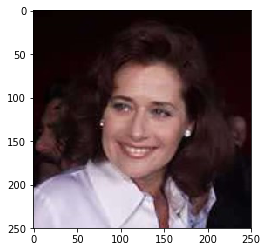

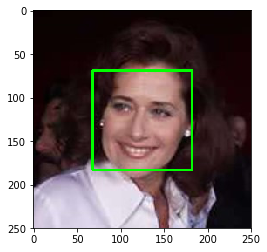

Hey, I can detect your face. You should be a human.
I am (95.18756%) confidence that You look like a ... (English springer spaniel)


Let me see the input image...


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


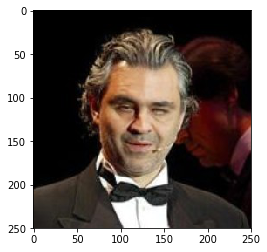

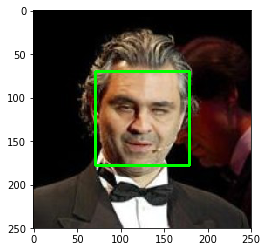

Hey, I can detect your face. You should be a human.
I am (47.79490%) confidence that You look like a ... (English springer spaniel)


Let me see the input image...


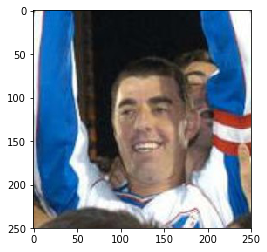

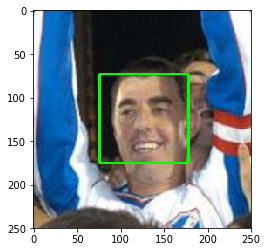

Hey, I can detect your face. You should be a human.
I am (99.84255%) confidence that You look like a ... (American water spaniel)


Let me see the input image...


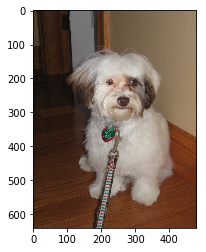

There should be a dog in the photo.
I am (60.16082%) confidence that the dog is a ... (Lhasa apso)


Let me see the input image...


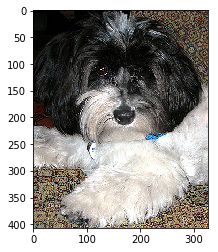

There should be a dog in the photo.
I am (99.36891%) confidence that the dog is a ... (Havanese)


Let me see the input image...


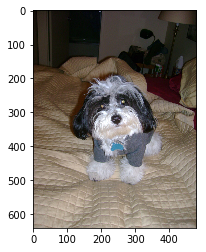

There should be a dog in the photo.
I am (85.96079%) confidence that the dog is a ... (Lhasa apso)


Let me see the input image...


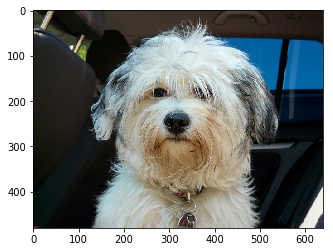

There should be a dog in the photo.
I am (99.59739%) confidence that the dog is a ... (Havanese)


Let me see the input image...


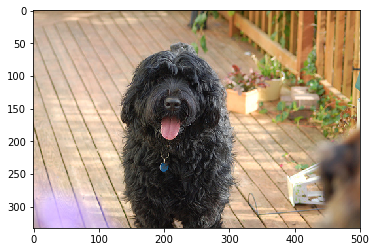

There should be a dog in the photo.
I am (96.12429%) confidence that the dog is a ... (Bouvier des flandres)


Let me see the input image...


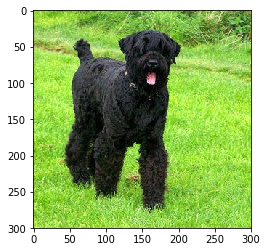

There should be a dog in the photo.
I am (98.48289%) confidence that the dog is a ... (Giant schnauzer)


In [53]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# create a list containing all file paths in test dataset
dog_files_test = np.array(glob("dogImages/test/*/*"))

# create a random index for testing
index = np.random.randint(0, len(dog_files_test))

# random testing
for file in np.hstack((human_files[index:index+3], dog_files_test[index:index+6])):
    run_app(file)

### Testing my own personal images



Let me see the input image...


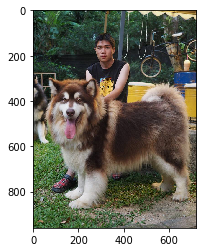

There should be a dog in the photo.
I am (99.99987%) confidence that the dog is a ... (Alaskan malamute)


Let me see the input image...


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


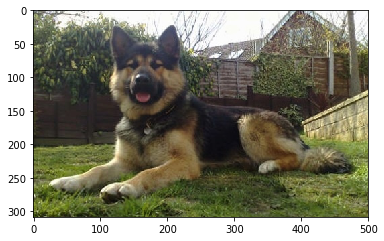

There should be a dog in the photo.
I am (100.00000%) confidence that the dog is a ... (German shepherd dog)


Let me see the input image...


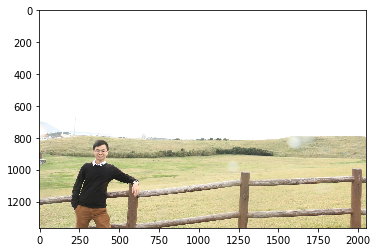

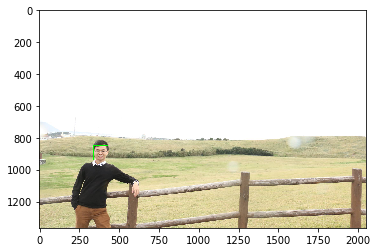

Hey, I can detect your face. You should be a human.
I am (30.53961%) confidence that You look like a ... (Bloodhound)


Let me see the input image...


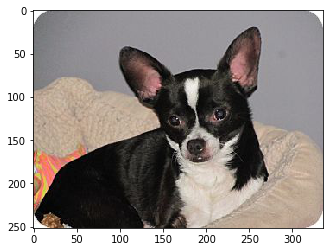

There should be a dog in the photo.
I am (99.99970%) confidence that the dog is a ... (Chihuahua)


Let me see the input image...


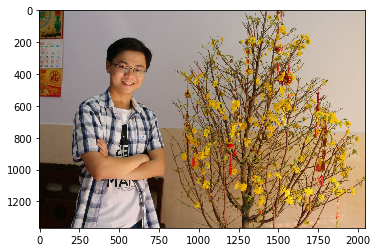

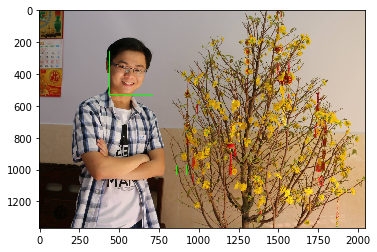

Hey, I can detect your face. You should be a human.
I am (86.06913%) confidence that You look like a ... (Kerry blue terrier)


Let me see the input image...


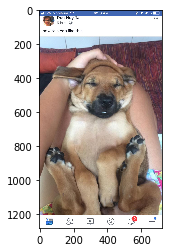

There should be a dog in the photo.
I am (86.95468%) confidence that the dog is a ... (Chinese shar-pei)


Let me see the input image...


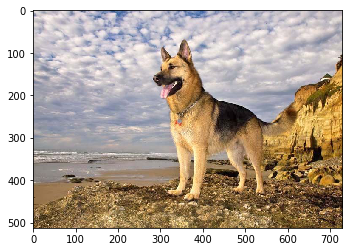

There should be a dog in the photo.
I am (47.96505%) confidence that the dog is a ... (German shepherd dog)


Let me see the input image...


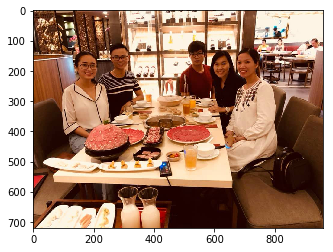

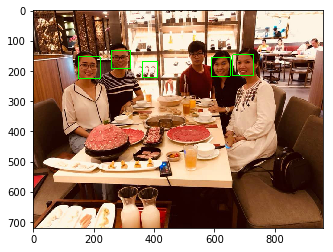

Hey, I can detect your face. You should be a human.
I am (35.39561%) confidence that You look like a ... (Norwich terrier)


Let me see the input image...


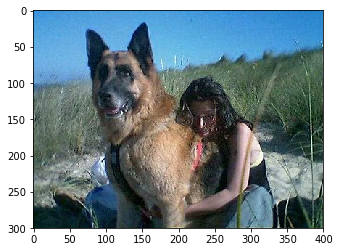

There should be a dog in the photo.
I am (87.60970%) confidence that the dog is a ... (German shepherd dog)


Let me see the input image...


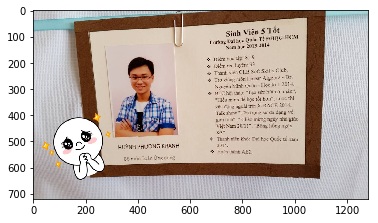

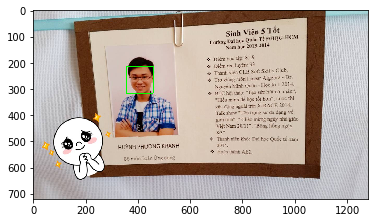

Hey, I can detect your face. You should be a human.
I am (87.25196%) confidence that You look like a ... (Brussels griffon)


Let me see the input image...


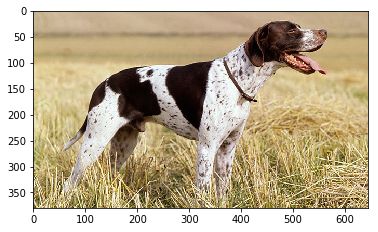

There should be a dog in the photo.
I am (99.95703%) confidence that the dog is a ... (German shorthaired pointer)


In [55]:
# testing images with human face or dog in it - valid testing

test_images = np.array(glob('./test_valid_images/*'))

for file in test_images:
    run_app(file)



Let me see the input image...


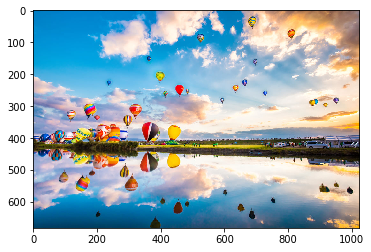

ValueError: Well, seems like no dog nor human here. I cannot classify the breeds. Please check again!

In [56]:
# testing images with human face or dog in it - valid testing
run_app('./test_invalid_images/test1.jpg')



Let me see the input image...


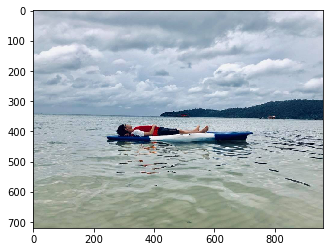

ValueError: Well, seems like no dog nor human here. I cannot classify the breeds. Please check again!

In [57]:
run_app('./test_invalid_images/landscape.jpg')